Contamination: 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.51      0.52      2498
       Relay       0.46      0.48      0.47      2166

    accuracy                           0.50      4664
   macro avg       0.49      0.49      0.49      4664
weighted avg       0.50      0.50      0.50      4664



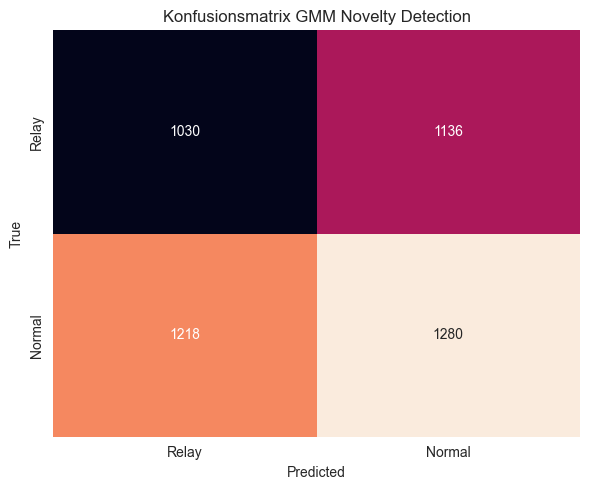

Contamination: 0.6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.51      0.51      2498
       Relay       0.43      0.42      0.42      2166

    accuracy                           0.47      4664
   macro avg       0.47      0.47      0.47      4664
weighted avg       0.47      0.47      0.47      4664



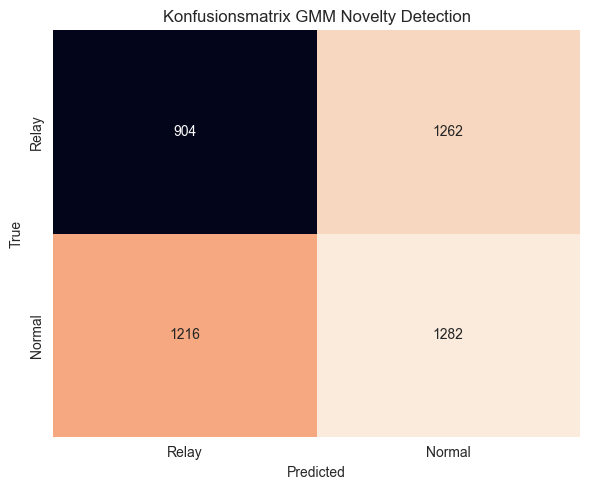

Contamination: 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.51      0.52      2498
       Relay       0.45      0.45      0.45      2166

    accuracy                           0.49      4664
   macro avg       0.48      0.48      0.48      4664
weighted avg       0.49      0.49      0.49      4664



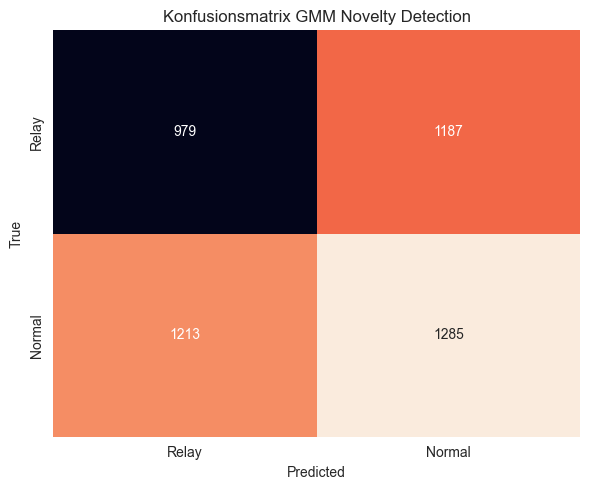

Contamination: 0.9

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.52      0.51      2498
       Relay       0.42      0.39      0.41      2166

    accuracy                           0.46      4664
   macro avg       0.46      0.46      0.46      4664
weighted avg       0.46      0.46      0.46      4664



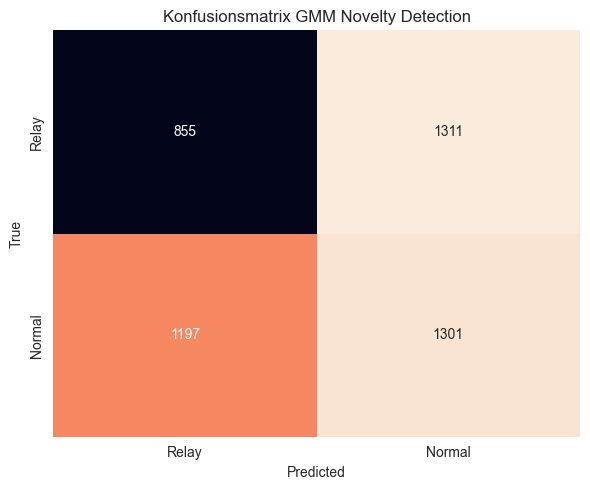

Contamination: 0.01

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.51      0.52      2498
       Relay       0.46      0.48      0.47      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



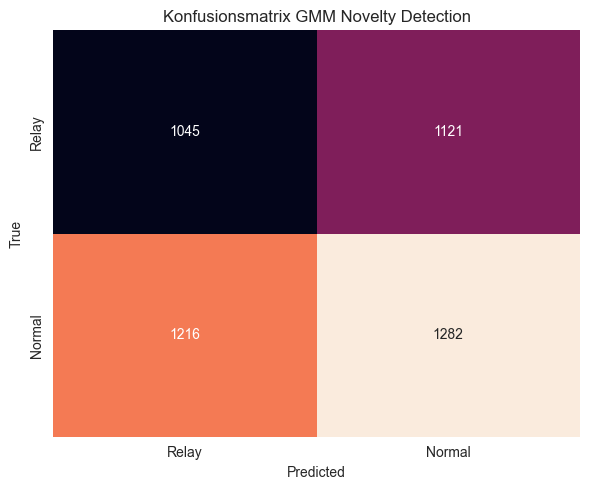

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pyod.models.ocsvm import OCSVM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for i in {0.01, 0.1, 0.3, 0.6, 0.9}:
    clf = OCSVM(contamination=len(X_test_relay)/len(X_test_combined), nu = i)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"Contamination: {i}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

    """SCALED DATEN AM BESTEN"""

Contamination: 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.98      0.70      2498
       Relay       0.74      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.64      0.52      0.40      4664
weighted avg       0.64      0.55      0.42      4664



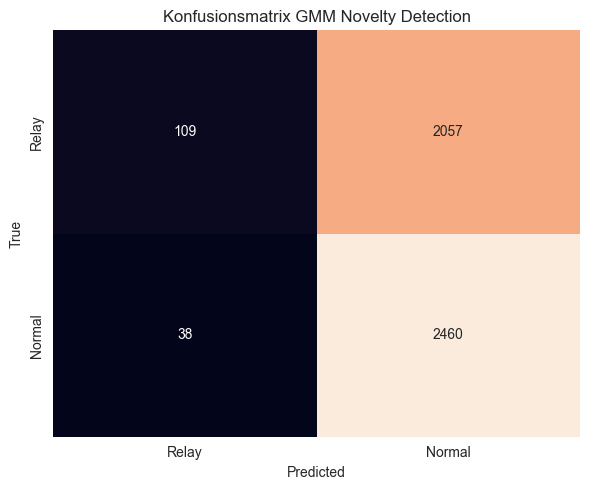

Contamination: 0.6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.72      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.63      0.51      0.38      4664
weighted avg       0.62      0.55      0.41      4664



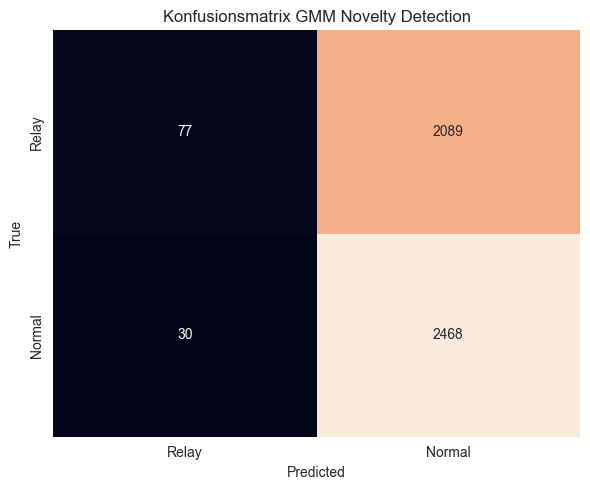

Contamination: 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.70      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.62      0.51      0.39      4664
weighted avg       0.62      0.55      0.41      4664



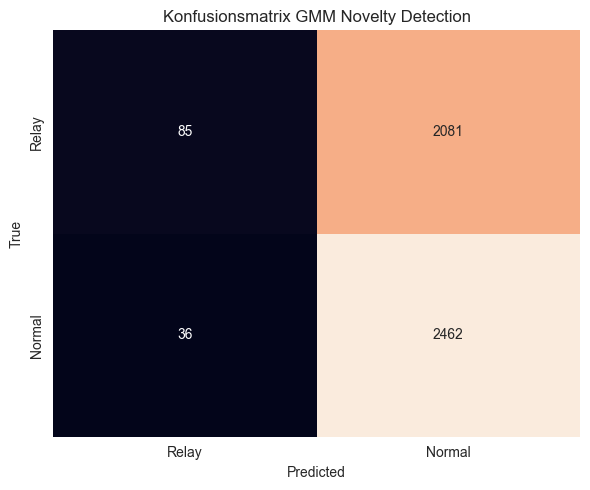

Contamination: 0.9

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.74      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.64      0.51      0.39      4664
weighted avg       0.63      0.55      0.41      4664



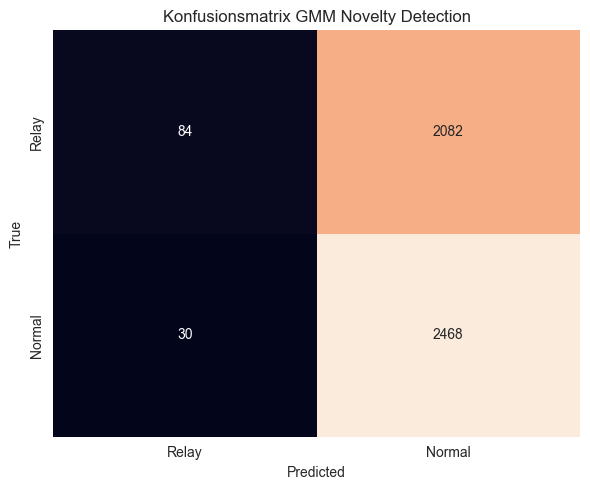

Contamination: 0.01

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2498
       Relay       0.79      0.05      0.10      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.52      0.40      4664
weighted avg       0.66      0.55      0.42      4664



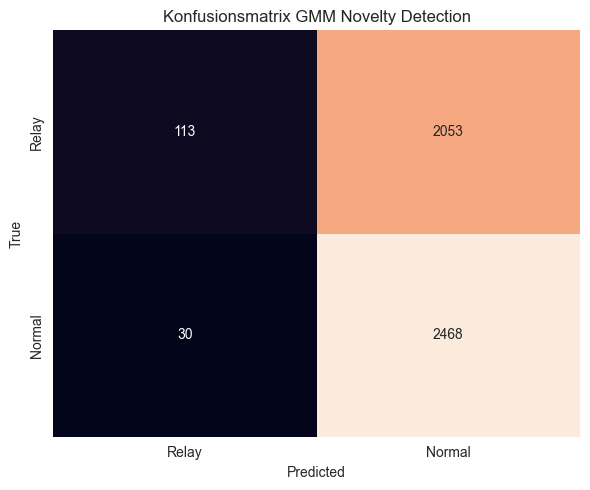

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.ocsvm import OCSVM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for i in {0.01, 0.1, 0.3, 0.6, 0.9}:
    clf = OCSVM(contamination=0.01, nu = i)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"Contamination: {i}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

    """SCALED DATEN AM BESTEN"""

Contamination: 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2498
       Relay       0.80      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.52      0.40      4664
weighted avg       0.66      0.55      0.42      4664



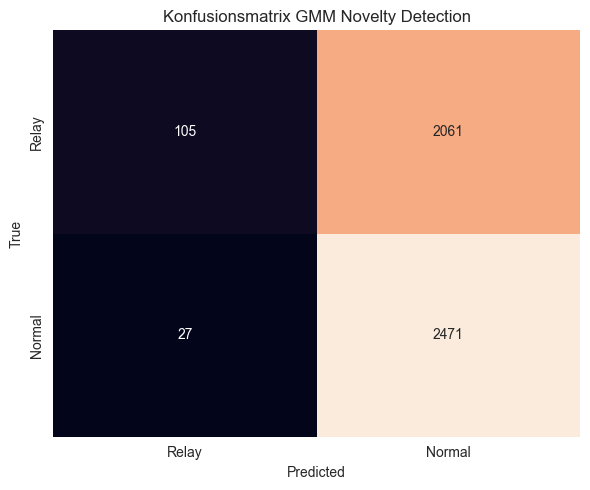

Contamination: 0.6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2498
       Relay       0.80      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.52      0.40      4664
weighted avg       0.66      0.55      0.42      4664



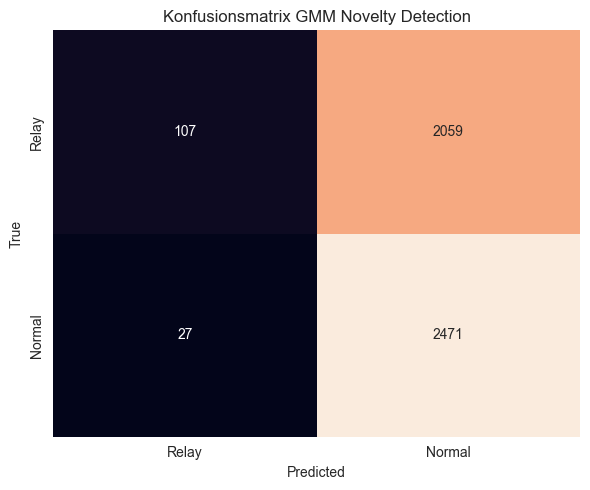

Contamination: 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2498
       Relay       0.80      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.52      0.40      4664
weighted avg       0.66      0.55      0.42      4664



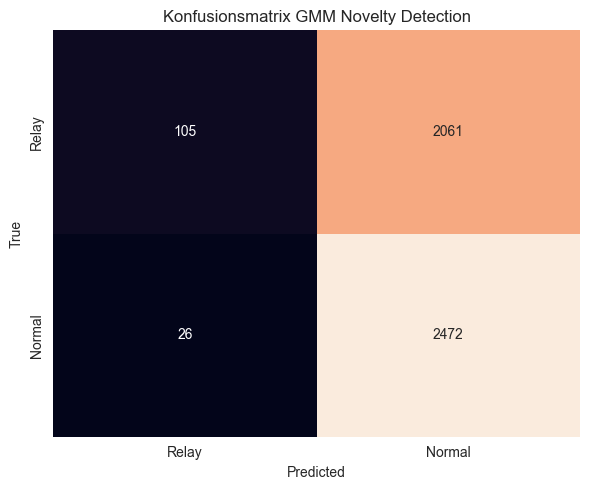

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.ocsvm import OCSVM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for i in {0.01, 0.1, 0.3, 0.6, 0.9}:
    clf = OCSVM(contamination=0.01, nu = i)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"Contamination: {i}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

    """SCALED DATEN AM BESTEN"""